In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.dropna(inplace=True)

In [7]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [8]:
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [10]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302


In [12]:
#day month
df['journey_day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [13]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3


In [15]:
#dep minute,hour
df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
df.drop('Dep_Time',axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,13302,1,3,16,50


In [18]:
# arrival hour,minute
df['arr_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arr_hour,arr_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [21]:
#categorical
Airline=pd.get_dummies(df['Airline'])

In [22]:
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
Source=pd.get_dummies(df['Source'])

In [24]:
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [25]:
Destination=pd.get_dummies(df['Destination'])

In [26]:
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [27]:
data_train=pd.concat([df,Airline,Destination,Source],axis=1)

In [28]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [29]:
data_train.head()

,Duration,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arr_hour,arr_minute,Air Asia,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,2h 50m,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,1,1,0,0,0,0
1,7h 25m,2,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,0,0,1,0
2,19h,2,13882,9,6,9,25,4,25,0,...,1,0,0,0,0,0,0,1,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,0,0,0,1,0
4,4h 45m,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,1,1,0,0,0,0


In [30]:
#Duration
import re
Duration=list(data_train['Duration'])
duration_hr=[]
duration_mi=[]
for i in Duration:
    l=re.split('h|m',i)
    if len(l[0])==0:
        l[0]='0'
    if len(l[1])==0:
        l[1]='0'
    duration_hr.append(int(l[0]))
    duration_mi.append(int(l[1]))

data_train['Duration_hours']=duration_hr
data_train['Duration_minute']=duration_mi
    
        
    

In [31]:
data_train.head()

,Duration,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arr_hour,arr_minute,Air Asia,...,Hyderabad,Kolkata,New Delhi,Banglore,Chennai,Delhi,Kolkata,Mumbai,Duration_hours,Duration_minute
0,2h 50m,0,3897,24,3,22,20,1,10,0,...,0,0,1,1,0,0,0,0,2,50
1,7h 25m,2,7662,1,5,5,50,13,15,0,...,0,0,0,0,0,0,1,0,7,25
2,19h,2,13882,9,6,9,25,4,25,0,...,0,0,0,0,0,1,0,0,19,0
3,5h 25m,1,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,0,1,0,5,25
4,4h 45m,1,13302,1,3,16,50,21,35,0,...,0,0,1,1,0,0,0,0,4,45


In [32]:
data_train.drop('Duration',axis=1,inplace=True)

In [35]:
data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_minute,arr_hour,arr_minute,Air Asia,Air India,...,Hyderabad,Kolkata,New Delhi,Banglore,Chennai,Delhi,Kolkata,Mumbai,Duration_hours,Duration_minute
0,0,3897,24,3,22,20,1,10,0,0,...,0,0,1,1,0,0,0,0,2,50
1,2,7662,1,5,5,50,13,15,0,1,...,0,0,0,0,0,0,1,0,7,25
2,2,13882,9,6,9,25,4,25,0,0,...,0,0,0,0,0,1,0,0,19,0
3,1,6218,12,5,18,5,23,30,0,0,...,0,0,0,0,0,0,1,0,5,25
4,1,13302,1,3,16,50,21,35,0,0,...,0,0,1,1,0,0,0,0,4,45


In [37]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'arr_hour', 'arr_minute', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Duration_hours', 'Duration_minute'],
      dtype='object')

In [38]:
X=data_train[['Total_Stops','journey_day', 'journey_month', 'dep_hour',
       'dep_minute', 'arr_hour', 'arr_minute', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy','Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi','Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Duration_hours', 'Duration_minute']]
y=data_train['Price']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
model=RandomForestRegressor()

In [43]:
model.fit(X,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
model.predict(X_train)

array([ 9130.875     , 13788.125     , 10583.1       , ...,
        7633.        ,  6549.73333333, 11300.8       ])

In [45]:
model.score(X_train,y_train)

0.9425070713305185

In [46]:
prediction=model.predict(X_test)

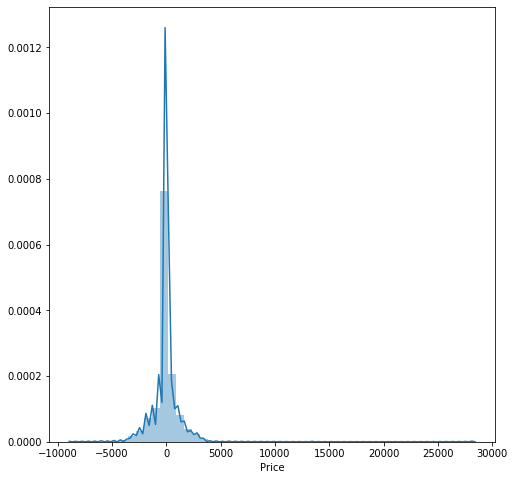

In [47]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [48]:
from sklearn.metrics import *
import numpy as np

In [49]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 618.0050848248933
MSE: 1362831.274691838
RMSE: 1167.4036468556358


In [50]:
r2_score(y_test,prediction)

0.9321079098596505

In [51]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

UnpicklingError: invalid load key, '\x00'.

In [121]:
!pip install pickle

  ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
